In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import itertools
import warnings
import statsmodels.api as sm
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
#plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['year']=df['date'].dt.year
df['week_of_year']=df.date.dt.weekofyear
df=df.set_index('date')
df.head()

,store,item,sales,month,day,year,week_of_year
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,1,2,2013,1
2013-01-03,1,1,14,1,3,2013,1
2013-01-04,1,1,13,1,4,2013,1
2013-01-05,1,1,10,1,5,2013,1


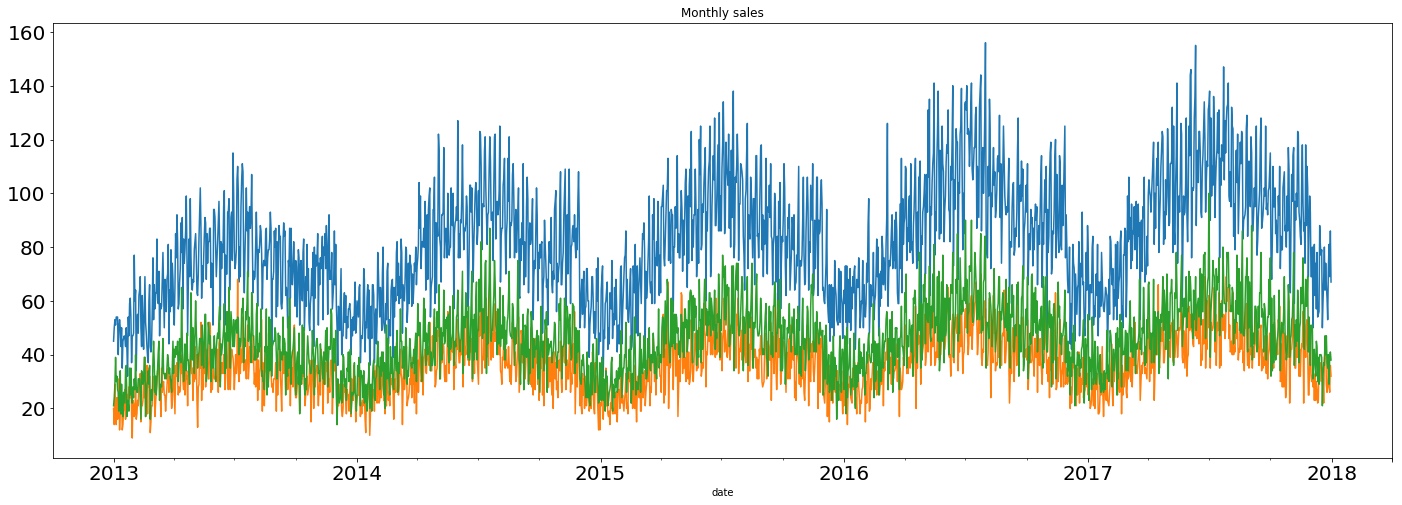

In [4]:
df1=pd.DataFrame()
df1=df.loc[df['item']==10]
df1=df1.loc[df1['store']==10]

df2=pd.DataFrame()
df2=df.loc[df['item']==20]
df2=df2.loc[df2['store']==5]

df3=pd.DataFrame()
df3=df.loc[df['item']==30]
df3=df3.loc[df3['store']==10]

df1.sales.plot(figsize=(24,8), title= 'Monthly sales', fontsize=20)
df2.sales.plot(figsize=(24,8), title= 'Monthly sales', fontsize=20)
df3.sales.plot(figsize=(24,8), title= 'Monthly sales', fontsize=20)

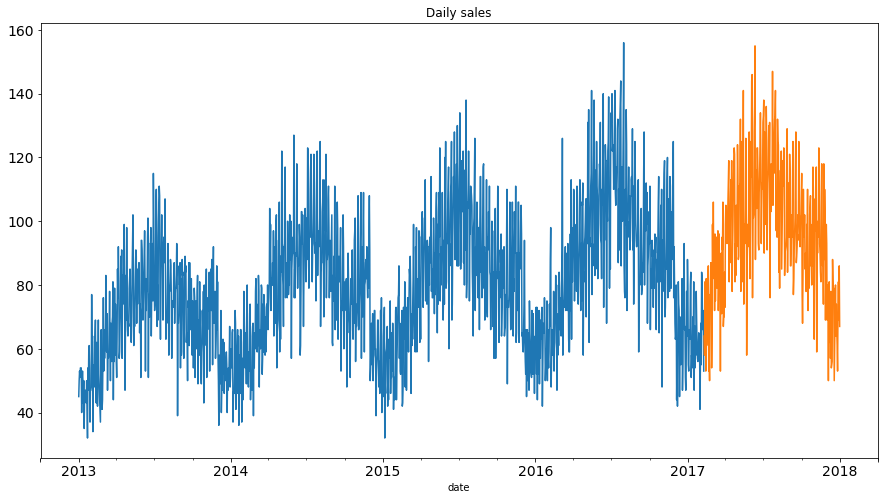

In [5]:
X = df1[df1.columns.drop('sales')]
Y=df1.loc[:,df1.columns == 'sales']
X_train, X_test = X[0:1500], X[1500:len(X)]
Y_train, Y_test = Y[0:1500], Y[1500:len(Y)]
df_train=pd.DataFrame(data=(X_train))
df_train['sales']=Y_train.sales
df_test=pd.DataFrame(X_test)
df_test['sales']=Y_test.sales
df_train.sales.plot(figsize=(15,8), title= 'Daily sales', fontsize=14)
df_test.sales.plot(figsize=(15,8), title= 'Daily sales', fontsize=14)
plt.show()

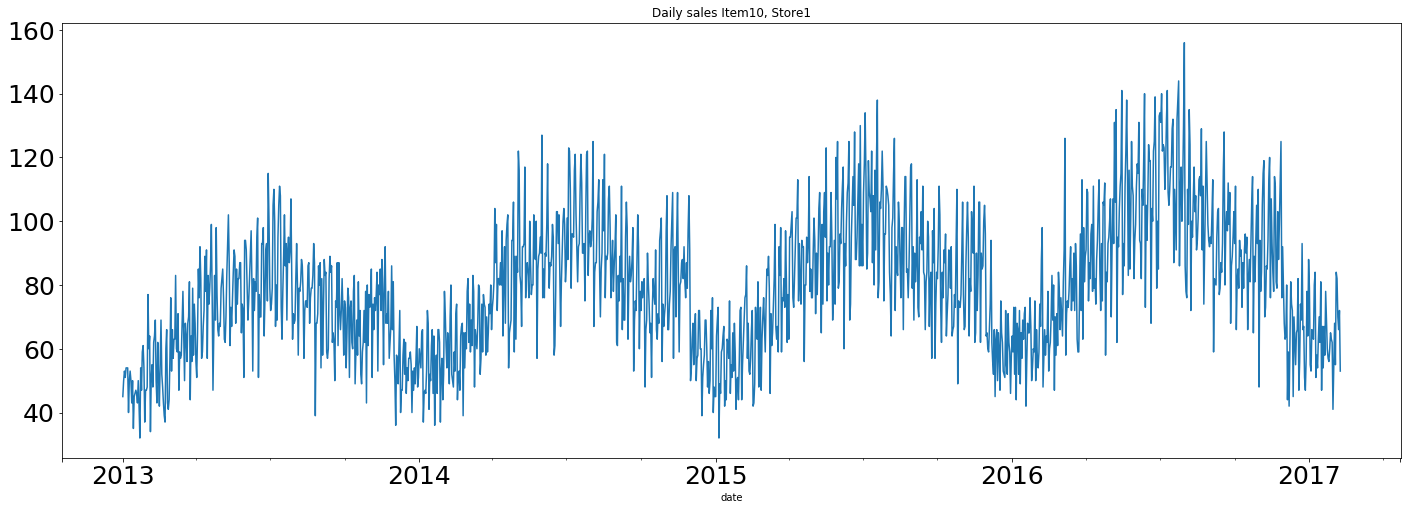

In [6]:
df_train.sales.plot(figsize=(24,8), title= 'Daily sales Item10, Store1', fontsize=25)

The time series has an obvious seasonality pattern, as well as an overall increasing trend.

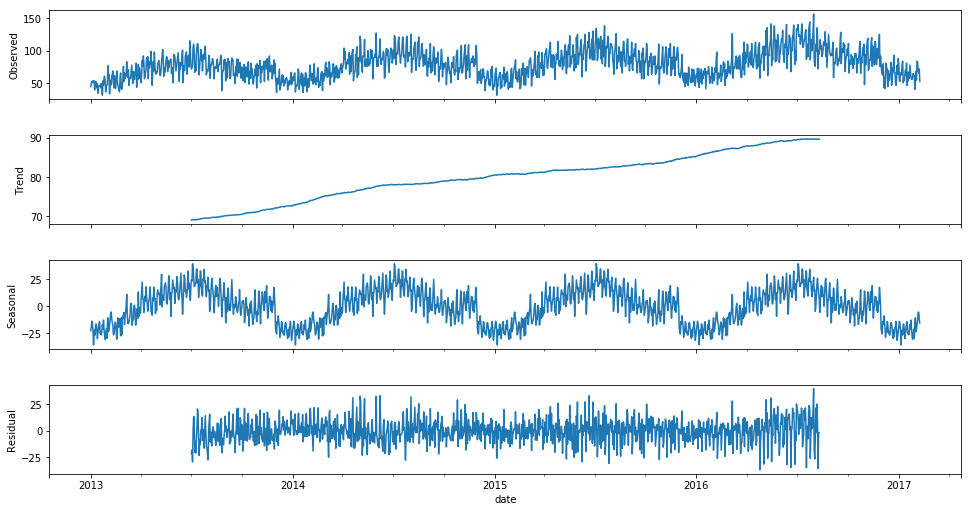

In [7]:
decomposition = seasonal_decompose(df_train.sales, freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  


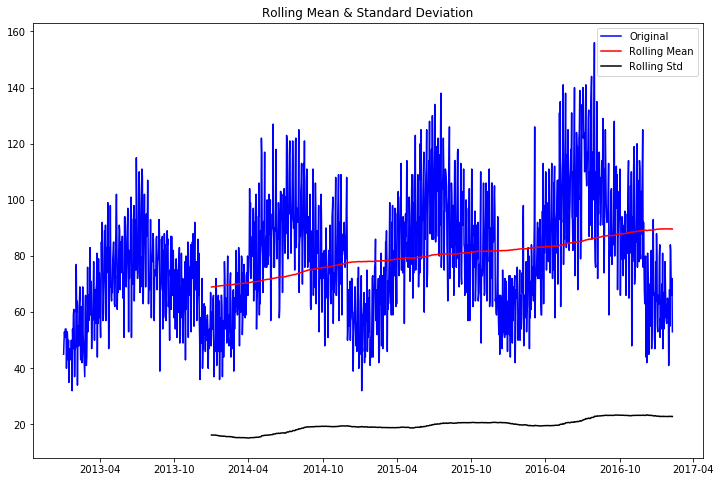

Results of Dickey-Fuller Test:
Test Statistic                   -2.898586
p-value                           0.045513
#Lags Used                       24.000000
Number of Observations Used    1475.000000
Critical Value (1%)              -3.434791
Critical Value (5%)              -2.863501
Critical Value (10%)             -2.567814
dtype: float64


In [9]:
test_stationarity(df_train.sales)

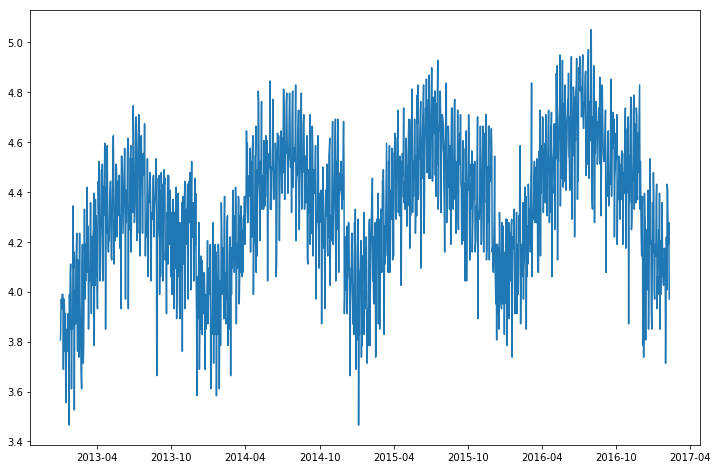

In [10]:
ts_log = np.log(df_train.sales)
fig = plt.figure(figsize=(12, 8))
plt.plot(ts_log)

/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  


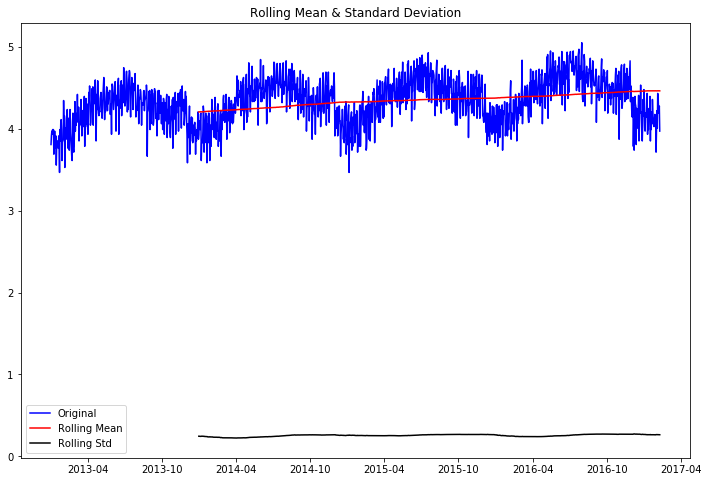

Results of Dickey-Fuller Test:
Test Statistic                   -3.085708
p-value                           0.027629
#Lags Used                       24.000000
Number of Observations Used    1475.000000
Critical Value (1%)              -3.434791
Critical Value (5%)              -2.863501
Critical Value (10%)             -2.567814
dtype: float64


In [11]:
test_stationarity(ts_log)

/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  


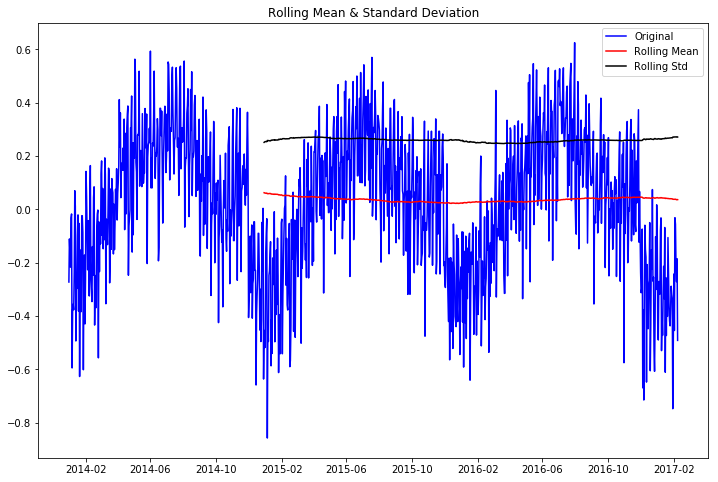

Results of Dickey-Fuller Test:
Test Statistic                   -2.060418
p-value                           0.260726
#Lags Used                       21.000000
Number of Observations Used    1114.000000
Critical Value (1%)              -3.436234
Critical Value (5%)              -2.864138
Critical Value (10%)             -2.568153
dtype: float64


In [12]:
#Moving Avg
moving_avg = pd.rolling_mean(ts_log,365)
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  


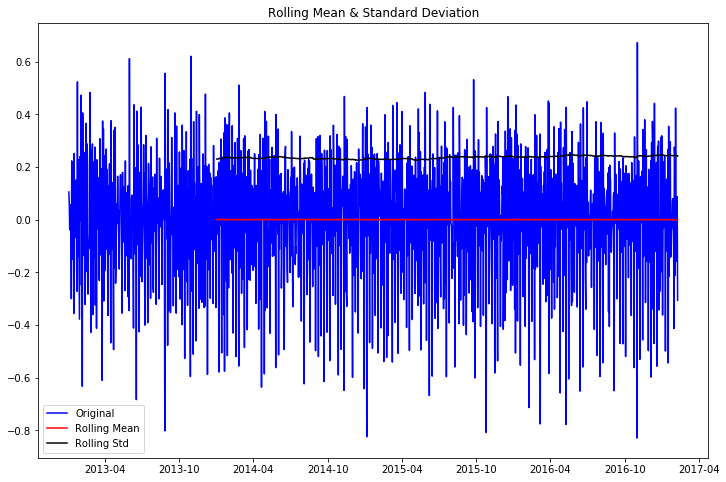

Results of Dickey-Fuller Test:
Test Statistic                -9.049639e+00
p-value                        4.879286e-15
#Lags Used                     2.300000e+01
Number of Observations Used    1.475000e+03
Critical Value (1%)           -3.434791e+00
Critical Value (5%)           -2.863501e+00
Critical Value (10%)          -2.567814e+00
dtype: float64


In [13]:
#Eliminating seasonality
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """
/home/nerifkh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).std()
  


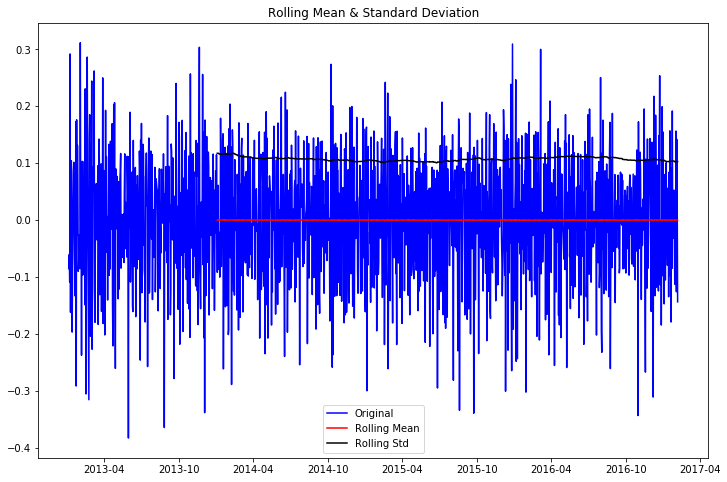

Results of Dickey-Fuller Test:
Test Statistic                -1.506535e+01
p-value                        8.882022e-28
#Lags Used                     2.300000e+01
Number of Observations Used    1.470000e+03
Critical Value (1%)           -3.434806e+00
Critical Value (5%)           -2.863508e+00
Critical Value (10%)          -2.567818e+00
dtype: float64


In [14]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Forecasting a Time Series

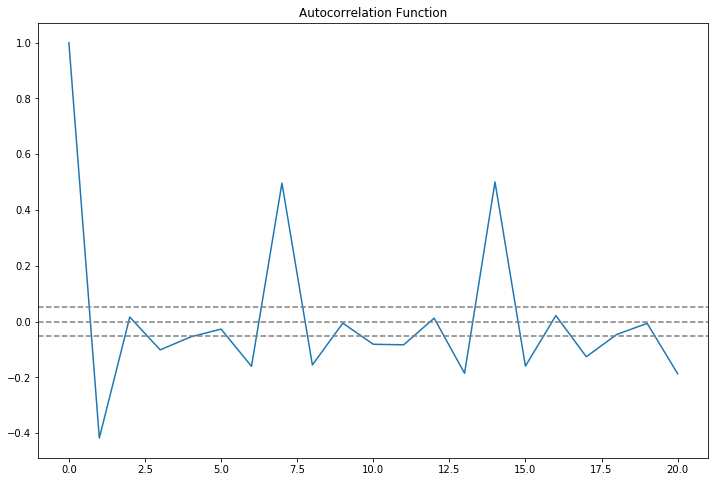

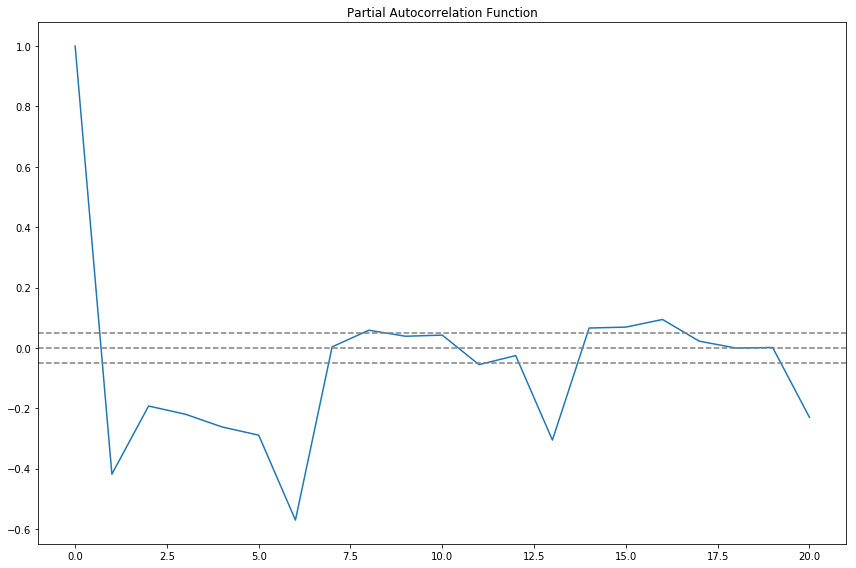

In [15]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
fig = plt.figure(figsize=(12, 8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

fig = plt.figure(figsize=(12, 8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# grid search (or hyperparameter optimization)

In [44]:
# Generate all different combinations of p, q and q triplets


In [60]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    try:
        mod = sm.tsa.statespace.ARIMA(ts_log_diff, order=param, enforce_stationarity=False, 
                                            enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, results.aic))
    except:
        continue

/home/nerifkh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/nerifkh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

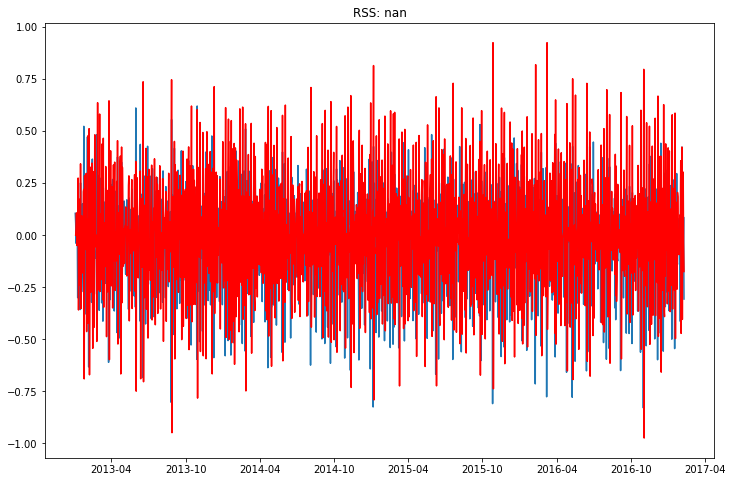

In [16]:
#AR Model
fig = plt.figure(figsize=(12, 8))
model = ARIMA(ts_log_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/home/nerifkh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/nerifkh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

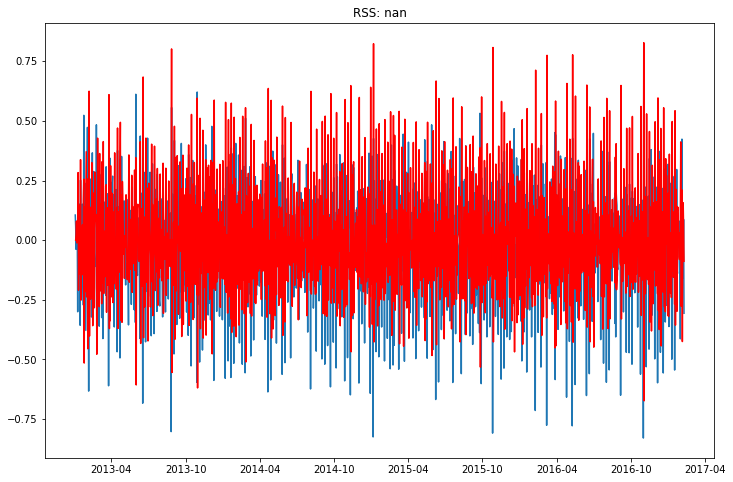

In [17]:
#MA
fig = plt.figure(figsize=(12, 8))
model = ARIMA(ts_log_diff, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     79.436     -0.013      0.990    -156.692     154.692
ar.S.L12   -4.741e-06      0.003     -0.002      0.999      -0.005       0.005
ma.S.L12      -1.0000     70.521     -0.014      0.989    -139.219     137.219
sigma2         0.0559      5.729      0.010      0.992     -11.174      11.285


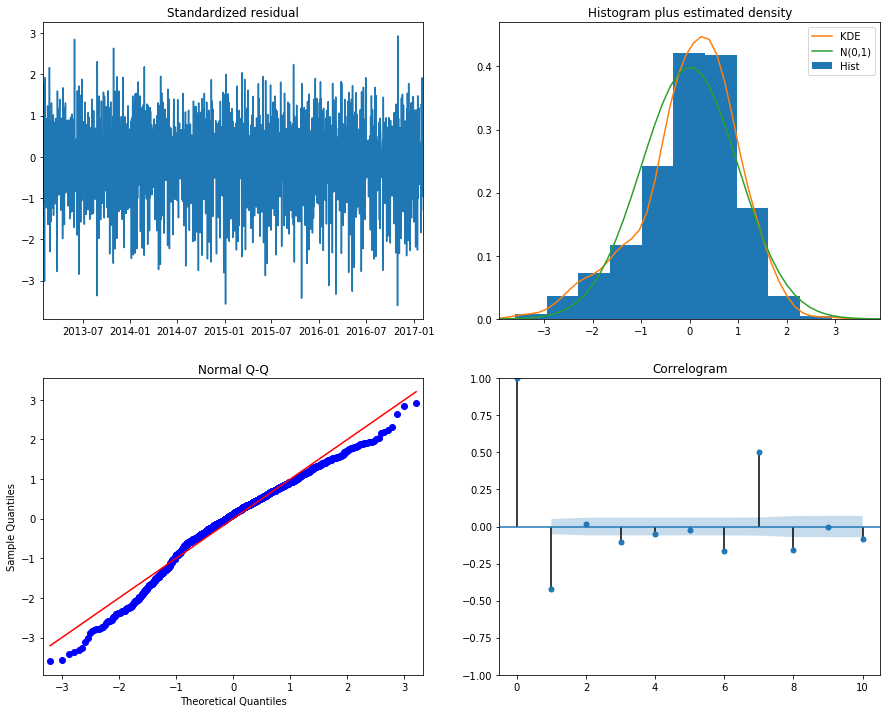

In [58]:
mod = sm.tsa.statespace.SARIMAX(ts_log_diff, order=(0, 1, 1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [21]:
SARIMA_diff_predictions=pd.Series(results.fittedvalues,copy=True)
SARIMA_diff_predictions_cumsum=SARIMA_diff_predictions.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(SARIMA_diff_predictions_cumsum,fill_value=0)
predictions_ARIMA=np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 55.7779')

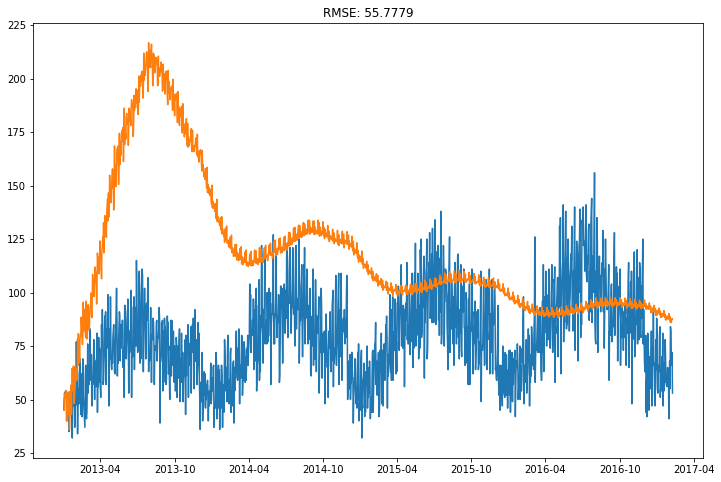

In [25]:
fig=plt.figure(figsize=(12, 8))
plt.plot(df_train.sales)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df_train.sales)**2)/len(df_train)))

# # here we will forecast with:SES, ... , ARIMA

Method 1 – Start with a Naive Approach

Method 2 – Simple average

Method 3 – Moving average

Method 4 – Single Exponential smoothing

Method 5 – Holt’s linear trend method

Method 6 – Holt’s Winter seasonal method

Method 7 – ARIMA

# Simple Exponential Smoothing

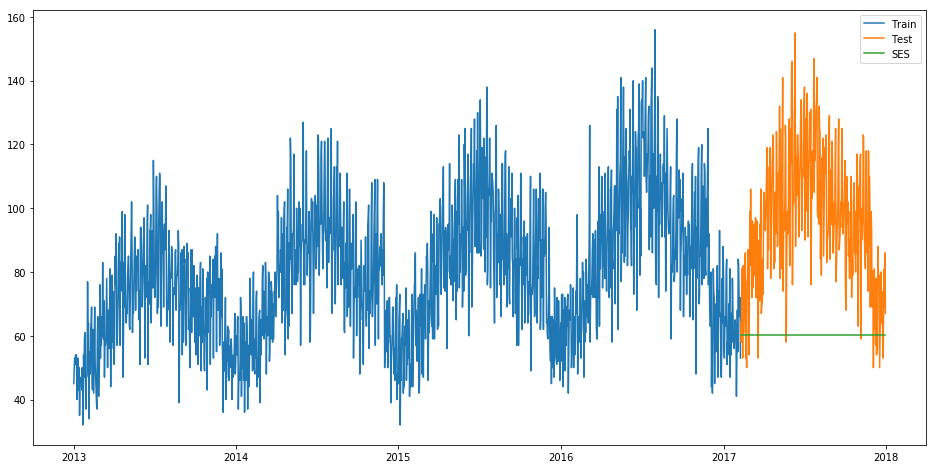

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = df_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(df_train['sales'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(df_test.sales, y_hat_avg.SES))
print(rms)

41.61995868839738


# Holt’s Linear Trend method

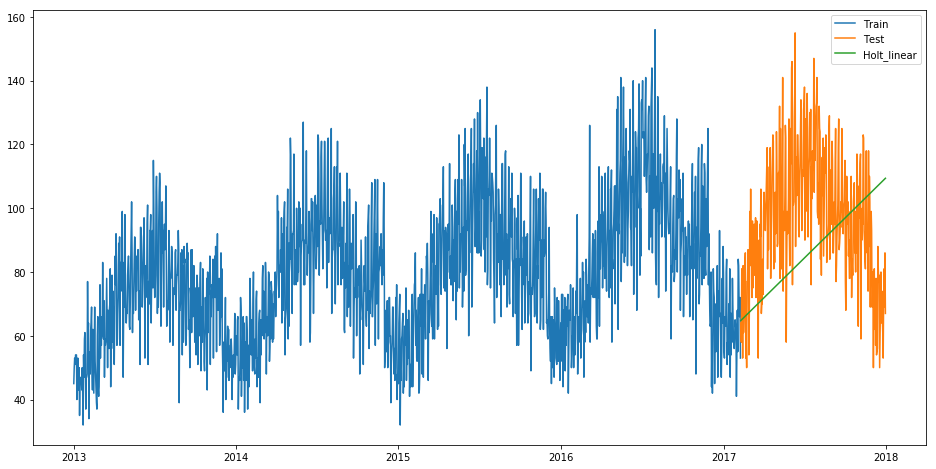

In [28]:
y_hat_avg = df_test.copy()

fit1 = Holt(np.asarray(df_train['sales'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(df_test))

plt.figure(figsize=(16,8))
plt.plot(df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [29]:
rms = sqrt(mean_squared_error(df_test.sales, y_hat_avg.Holt_linear))
print(rms)

26.88399075260252


# Holt-Winters Method

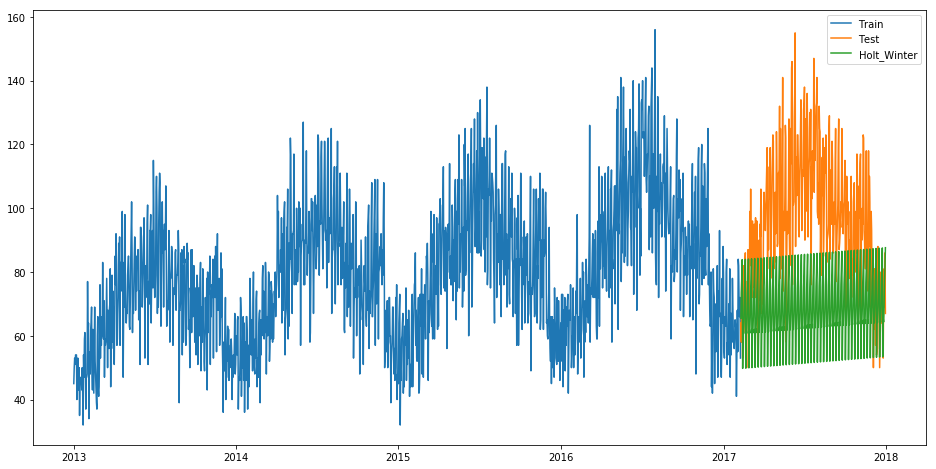

In [31]:
y_hat_avg = df_test.copy()
fit1 = ExponentialSmoothing(np.asarray(df_train['sales']) ,seasonal_periods=7,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [32]:
rms = sqrt(mean_squared_error(df_test.sales, y_hat_avg.Holt_Winter))
print(rms)

32.17146644806146


/home/nerifkh/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


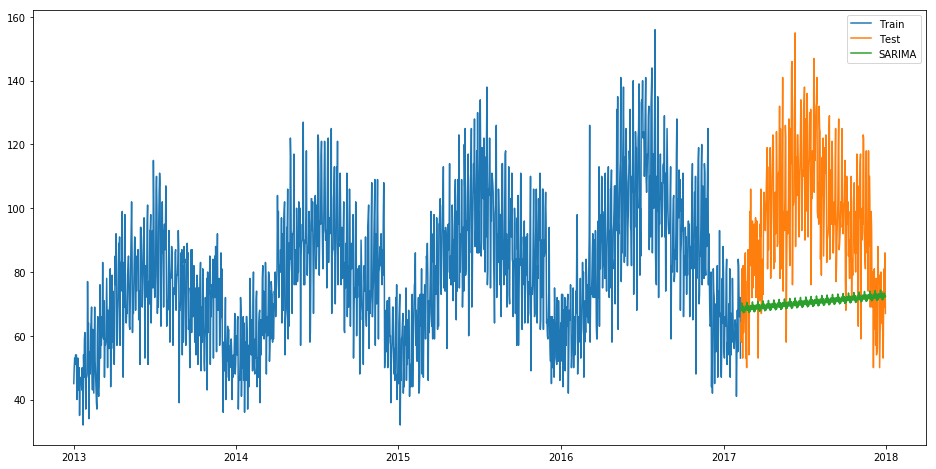

In [33]:
y_hat_avg = df_test.copy()
fit1 = sm.tsa.statespace.SARIMAX(df_train.sales, order=(0, 1, 1),seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2017-01-01", end="2017-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(df_test.sales, y_hat_avg.SARIMA))
print(rms)

33.101102982150245


# => Holt_linear outperformed

# # Now prediction:


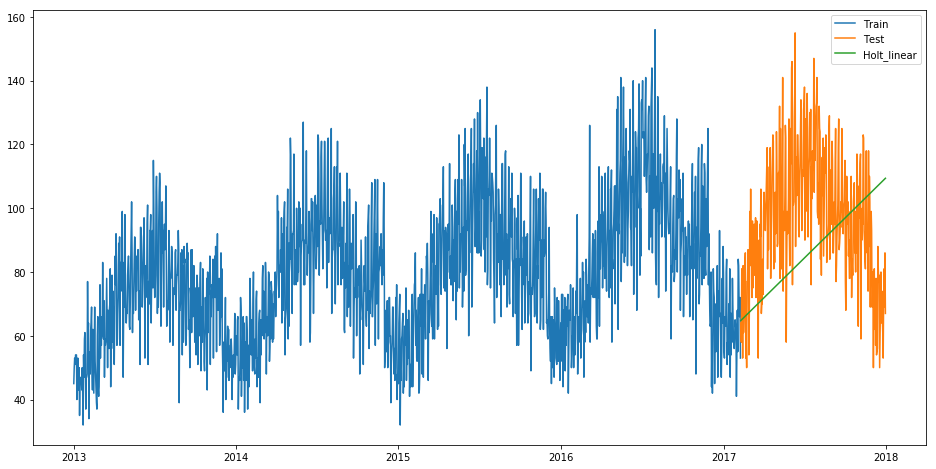

In [35]:
y_hat_avg = df_test.copy()

fit1 = Holt(np.asarray(df_train['sales'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(df_test))

plt.figure(figsize=(16,8))
plt.plot(df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

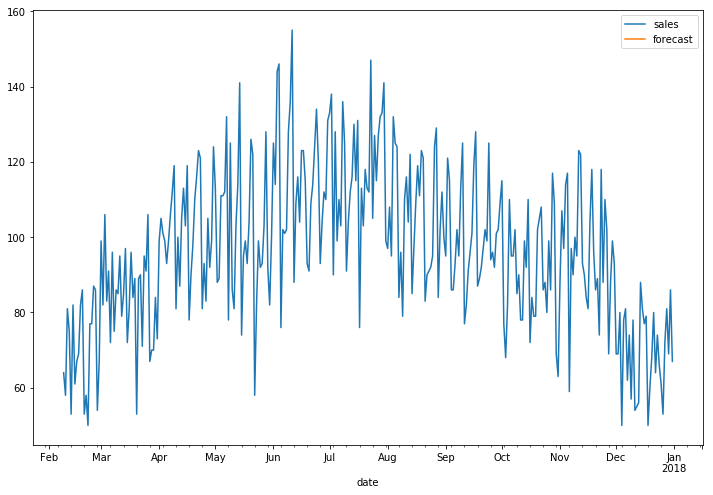

In [55]:
results = mod.fit()
df_test['forecast'] = results.predict( dynamic= True)  
df_test[['sales', 'forecast']].plot(figsize=(12, 8))

In [52]:
start = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(0,31)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df_pred = pd.concat([df, future])
df_pred['forecast'] = results.get_prediction(start = 913001 , end = 913039, dynamic= True)  
df_pred[['sales', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 